In [1]:
import sys
sys.path.append('../')

In [2]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [3]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from '../vision_benchmarks.pyc'>

In [ ]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        result_feedback = x['result_feedback']
        #compare_to_result_strength = x['compare_to_result_strength']
    )
    return {
        'loss': 
            abs(vals['AIT_to_PFC'] - 0.03) + abs(vals['PFC_to_PMC'] - 0.02) + abs(vals['PMC_to_MC'] - 0.025),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {#'compare_to_result_strength': hp.uniform('compare_to_result_strength', 0, 1),
                     'result_feedback': hp.uniform('result_feedback', 0, 1)
                    },
            algo = rand.suggest,
            max_evals = 100,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('result_feedback_data', 'w'))

In [5]:
print(best)

{'result_feedback': 0.5238333199546759}


How does this compare to the value that the multi-parameter hyperopt gave for this variable? It's close - the initial value for the result_feedback parameter is 0.4195086163487056.

In [6]:
import pandas
import seaborn as sns
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

In [11]:
df = df[df._compare_to_result_strength == 0.12966085928477078]
df = df[df._AIT_r_transform == 0.8079719992231219]
df = df[df._V1_r_transform == 0.11090645719111913]
df = df[df._AIT_V1_strength == 0.06848695023305285]
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
2,0.022,-0.036,0.095,-0.016,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.797402,2,1,0.031,0.005
4,0.022,-0.036,0.095,-0.012,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.769794,2,1,0.022,0.005
6,0.022,-0.018,0.052,0.020,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.575406,2,1,0.023,0.005
7,0.022,0.002,0.020,0.033,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.506726,2,1,0.030,0.005
13,0.022,0.055,0.003,0.021,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.313620,2,1,0.028,0.005
16,0.022,-0.063,0.156,-0.054,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.967699,2,1,0.022,0.005
19,0.022,0.075,0.002,0.014,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.035589,2,1,0.045,0.005
21,0.022,-0.042,0.113,-0.028,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.833393,2,1,0.022,0.005
23,0.022,-0.039,0.142,-0.057,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.843284,2,1,0.019,0.005
24,0.022,0.077,0.002,0.019,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.068456,2,1,0.052,0.005


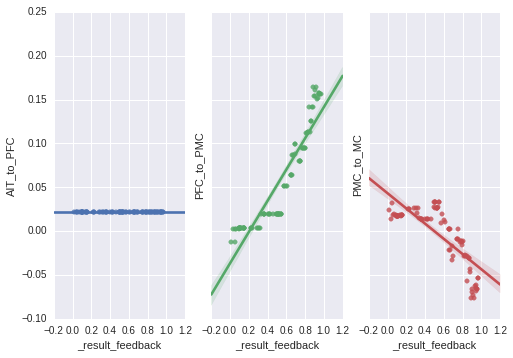

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_result_feedback'
sns.regplot(x, y = 'AIT_to_PFC', ax = ax1, data = df)
sns.regplot(x, y = 'PFC_to_PMC', ax = ax2, data = df)
sns.regplot(x, y = 'PMC_to_MC', ax = ax3, data = df)


Why is the PMC_to_MC value sometimes negative (especially for values of result_feedback that are >= 0.6)?
The PMC values come from the output of the result state, MC values come from the motor_system motor output. The motor_system motor state has a feedback connection controlled by the parameter called motor_feedback. In the notebook called hyperopt_vision_plus, where multiple parameters were being optimized over, the result_feedback vs PMC to MC graph yeilded negative values always.

Now, the result_feedback vs PMC_to_MC graph has negative values only when result_feedback is >= 0.6. The motor_feedback parameter is set to 0.06848695023305285 for this notebook. Maybe the memory component of the motor_system motor state is less then that of the result state - therefore it forgets faster. So when we decode out the spiking pattern, the result (aka PMC) takes longer to cross the similarity threshold at which we record PMC_start. The motor has less memory, so it crosses the threshold at which we record the value for MC_start faster. Therefore, MC_start would sometimes be smaller then PMC_start. Since PMC_to_MC is MC_start - PMC_start, the value would at times be negative.

The solution to this would be to optimize the motor system and then do the result feedback afterwards, which is what I'm going to do.